<a href="https://colab.research.google.com/github/SarinaMashreghi/ML-notebooks/blob/main/tensorflow_5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


##Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-12 03:45:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  19.3MB/s    in 6.8s    

2023-01-12 03:45:40 (15.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print("there are ", len(dirnames), " directories and ", len(filenames), " images in ", dirpath)

In [ ]:
steak_train = len(os.listdir("pizza_steak/train/steak"))
steak_test = len(os.listdir("pizza_steak/test/steak"))

steak_train, steak_test

##Visualizing the data


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

image shape:  (384, 512, 3)
[[[252 252 242]
  [249 250 242]
  [249 252 243]
  ...
  [207 235 249]
  [202 230 244]
  [193 220 237]]

 [[252 253 245]
  [249 252 245]
  [247 252 245]
  ...
  [202 231 247]
  [198 225 242]
  [191 218 235]]

 [[248 253 247]
  [246 251 245]
  [245 251 247]
  ...
  [206 235 251]
  [203 230 247]
  [195 222 239]]

 ...

 [[105 120 123]
  [106 121 126]
  [107 122 127]
  ...
  [172 205 222]
  [170 206 222]
  [167 203 219]]

 [[104 119 122]
  [104 119 124]
  [105 120 125]
  ...
  [165 200 219]
  [163 200 218]
  [161 198 216]]

 [[104 119 122]
  [104 119 124]
  [104 119 124]
  ...
  [158 195 213]
  [158 195 214]
  [157 194 213]]]


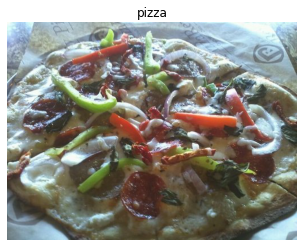

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random(target_dir, target_class):
  target_folder = target_dir + "/" + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  # print(random_image, random_image[0])
  image = mpimg.imread(target_folder + "/" + random_image[0])  #turns into array(tensor)
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")
  print("image shape: ", image.shape)
  print(image)

view_random("pizza_steak/train", "pizza")

##Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="/content/pizza_steak/train",
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)   #creates labeled data

valid_data = valid_datagen.flow_from_directory(directory="/content/pizza_steak/test",
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


##CNN Model

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
                               
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
                               
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data, epochs=10)

Epoch 1/10
12/47 [======>.......................] - ETA: 5s - loss: 0.6675 - accuracy: 0.6276

KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

In [ ]:
tf.keras.utils.plot_model(model_1)

In [ ]:
#without cnn

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_2.fit(train_data, epochs=10)

In [ ]:
model_1.evaluate(valid_data), model_2.evaluate(valid_data)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# pd.DataFrame(history_1.history).plot
plt.plot(pd.DataFrame(history_1.history))  

##Data augmentation

In [ ]:
train_augmented = ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True)



train_aug_data = train_augmented.flow_from_directory(directory="/content/pizza_steak/train",
                                                     target_size=(224,224),
                                                     class_mode="binary")


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential 

model_3 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),
    
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2,
              padding="valid"),

    Flatten(),
    Dense(1, activation="sigmoid")

])

model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model_3.fit(train_aug_data, epochs=10)

In [ ]:
#sample augmented images 

import random
rand_num = random.randint(0, 32)

plt.imshow(train_aug_data[4][0][rand_num])
plt.axis("off")

#Multi class


In [ ]:
import tensorflow as tf

In [ ]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-01-13 03:41:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.153.128, 2a00:1450:4013:c07::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  39.4MB/s    in 13s     

2023-01-13 03:41:47 (37.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} files in {dirpath}")

there are 2 directories and 0 files in 10_food_classes_all_data
there are 10 directories and 0 files in 10_food_classes_all_data/train
there are 0 directories and 750 files in 10_food_classes_all_data/train/pizza
there are 0 directories and 750 files in 10_food_classes_all_data/train/ramen
there are 0 directories and 750 files in 10_food_classes_all_data/train/ice_cream
there are 0 directories and 750 files in 10_food_classes_all_data/train/sushi
there are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_curry
there are 0 directories and 750 files in 10_food_classes_all_data/train/hamburger
there are 0 directories and 750 files in 10_food_classes_all_data/train/grilled_salmon
there are 0 directories and 750 files in 10_food_classes_all_data/train/chicken_wings
there are 0 directories and 750 files in 10_food_classes_all_data/train/fried_rice
there are 0 directories and 750 files in 10_food_classes_all_data/train/steak
there are 10 directories and 0 files in 10_food

In [ ]:
#reading the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="/content/10_food_classes_all_data/train",
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)   #creates labeled data

valid_data = valid_datagen.flow_from_directory(directory="/content/10_food_classes_all_data/test",
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import pathlib
import random
import numpy as np


data_dir = pathlib.Path("/content/10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
img = view_random(target_dir="/content/10_food_classes_all_data/test",
                  target_class=random.choice(class_names))

plt.imshow(img)

NameError: ignored

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

In [ ]:
model_4.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
model_4.fit(train_data, epochs=10)

Epoch 1/10
235/235 [==============================] - 41s 166ms/step - loss: 2.1235 - accuracy: 0.2403
Epoch 2/10
235/235 [==============================] - 38s 159ms/step - loss: 1.8010 - accuracy: 0.3863
Epoch 3/10
235/235 [==============================] - 37s 159ms/step - loss: 1.3333 - accuracy: 0.5575
Epoch 4/10
235/235 [==============================] - 37s 157ms/step - loss: 0.7150 - accuracy: 0.7724
Epoch 5/10
235/235 [==============================] - 38s 160ms/step - loss: 0.2530 - accuracy: 0.9237
Epoch 6/10
235/235 [==============================] - 37s 156ms/step - loss: 0.0877 - accuracy: 0.9783
Epoch 7/10
235/235 [==============================] - 37s 157ms/step - loss: 0.0374 - accuracy: 0.9915
Epoch 8/10
235/235 [==============================] - 36s 155ms/step - loss: 0.0292 - accuracy: 0.9937
Epoch 9/10
235/235 [==============================] - 38s 160ms/step - loss: 0.0707 - accuracy: 0.9783
Epoch 10/10
235/235 [==============================] - 36s 155ms/step - l

In [ ]:
model_4.evaluate(valid_data)

79/79 [==============================] - 12s 146ms/step - loss: 5.6454 - accuracy: 0.2860


[5.645401477813721, 0.28600001335144043]

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])

In [ ]:
model_5.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data, epochs=5)

Epoch 1/5
235/235 [==============================] - 37s 154ms/step - loss: 2.3779 - accuracy: 0.1827
Epoch 2/5
235/235 [==============================] - 36s 153ms/step - loss: 1.6792 - accuracy: 0.4499
Epoch 3/5
235/235 [==============================] - 37s 156ms/step - loss: 0.8296 - accuracy: 0.7604
Epoch 4/5
235/235 [==============================] - 39s 165ms/step - loss: 0.2425 - accuracy: 0.9448
Epoch 5/5
235/235 [==============================] - 37s 158ms/step - loss: 0.0680 - accuracy: 0.9895


In [ ]:
model_5.evaluate(valid_data)

79/79 [==============================] - 13s 164ms/step - loss: 3.8950 - accuracy: 0.2420


[3.8949766159057617, 0.24199999868869781]

##Data augmentation

In [ ]:
train_data_gen_aug = ImageDataGenerator(rescale=1/255.,
                                     rotation_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     horizontal_flip=True)

train_data_aug = train_data_gen_aug.flow_from_directory(directory="/content/10_food_classes_all_data/train",
                                                        target_size=(224,224))

Found 7500 images belonging to 10 classes.


In [ ]:
model_6 = tf.keras.models.clone_model(model_4)

model_6.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_aug, epochs=5)

Epoch 1/5
235/235 [==============================] - 103s 437ms/step - loss: 2.2975 - accuracy: 0.1568
Epoch 2/5
235/235 [==============================] - 104s 441ms/step - loss: 2.1452 - accuracy: 0.2284
Epoch 3/5
235/235 [==============================] - 104s 441ms/step - loss: 2.0684 - accuracy: 0.2731
Epoch 4/5
235/235 [==============================] - 103s 438ms/step - loss: 1.9957 - accuracy: 0.3077
Epoch 5/5
235/235 [==============================] - 104s 442ms/step - loss: 1.9612 - accuracy: 0.3188


In [ ]:
model_6.evaluate(valid_data)

79/79 [==============================] - 11s 141ms/step - loss: 1.8363 - accuracy: 0.3700


[1.8362507820129395, 0.3700000047683716]